In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

X, y = load_digits(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [57]:
def write(answers, f):
    with open(f'{f}.txt', 'w') as fl:
        answers = list(map(lambda x: f'{x}', answers))
        fl.write(' '.join(answers))

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

ans1 = cross_val_score(model, X, y, cv=10).mean()

write([ans1], 1)

In [24]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(n_estimators=100)

ans2 = cross_val_score(model, X, y, cv=10).mean()

print(ans2)

0.9198386095592799


In [25]:
write([ans2], 2)

In [29]:
%%time
import math 

l = X.shape[1]
d = math.sqrt(l) / l
model = BaggingClassifier(n_estimators=100, max_features=d)

ans3 = cross_val_score(model, X, y, cv=10).mean()

print(ans3)

0.9337833643699565
CPU times: user 5.14 s, sys: 145 ms, total: 5.28 s
Wall time: 5.31 s


In [30]:
write([ans3], 3)

In [31]:
%%time
submodel = DecisionTreeClassifier(max_features=d)
model = BaggingClassifier(submodel, n_estimators=100)

ans4 = cross_val_score(model, X, y, cv=10).mean()

print(ans4)

0.9526908752327745
CPU times: user 5.46 s, sys: 96.3 ms, total: 5.56 s
Wall time: 6.04 s


In [32]:
write([ans4], 4)

In [43]:
%%time
from sklearn.ensemble import RandomForestClassifier

ns = [5, 10, 20, 50, 100]

tree_scores = []
scores = []

for n in ns:
    tree_model = RandomForestClassifier(max_features=d, n_estimators=n)
    tree_score = cross_val_score(tree_model, X, y, cv=10).mean()
    tree_scores.append(tree_score)
    
    submodel = DecisionTreeClassifier(max_features=d)
    model = BaggingClassifier(submodel, n_estimators=n)
    score = cross_val_score(model, X, y, cv=10).mean()
    scores.append(score)

CPU times: user 19.7 s, sys: 324 ms, total: 20.1 s
Wall time: 21.9 s


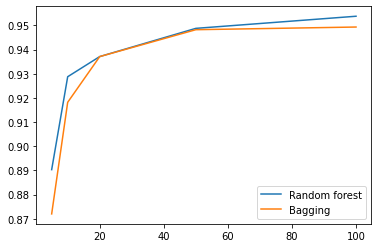

In [44]:
import matplotlib.pyplot as plt

plt.plot(ns, tree_scores, label='Random forest')
plt.plot(ns, scores, label='Bagging')
plt.legend()
plt.show()

#### 4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

In [48]:
%%time
ds = [5, 10, 40, 50]
n = 100
tree_scores = []
scores = []

for d in ds:
    tree_model = RandomForestClassifier(max_features=d, n_estimators=n)
    tree_score = cross_val_score(tree_model, X, y, cv=10).mean()
    tree_scores.append(tree_score)
    
    submodel = DecisionTreeClassifier(max_features=d)
    model = BaggingClassifier(submodel, n_estimators=n)
    score = cross_val_score(model, X, y, cv=10).mean()
    scores.append(score)

CPU times: user 1min 4s, sys: 435 ms, total: 1min 5s
Wall time: 1min 5s


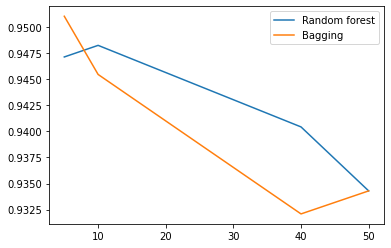

In [49]:
import matplotlib.pyplot as plt

plt.plot(ds, tree_scores, label='Random forest')
plt.plot(ds, scores, label='Bagging')
plt.legend()
plt.show()

In [51]:
%%time
depths = [5, 6]
n = 100
tree_scores = []

for depth in depths:
    tree_model = RandomForestClassifier(max_features=d, n_estimators=n, max_depth=depth)
    tree_score = cross_val_score(tree_model, X, y, cv=10).mean()
    tree_scores.append(tree_score)

CPU times: user 18.1 s, sys: 143 ms, total: 18.3 s
Wall time: 18.5 s


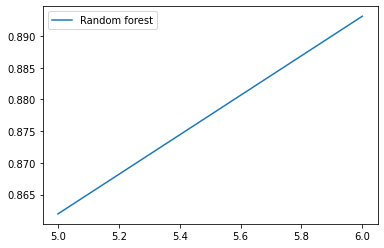

In [52]:
import matplotlib.pyplot as plt

plt.plot(depths, tree_scores, label='Random forest')
plt.legend()
plt.show()

# Answers

In [59]:
write([2, 3, 4, 7], 5)